In [2]:
import numpy as np
import pandas as pd

In [3]:
df_temp = pd.read_csv('./db/GlobalLandTemperaturesByCity.csv')
df_temp

,dt,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude
0,1743-11-01,6.068,1.737,Århus,Denmark,57.05N,10.33E
1,1743-12-01,NaN,NaN,Århus,Denmark,57.05N,10.33E
2,1744-01-01,NaN,NaN,Århus,Denmark,57.05N,10.33E
3,1744-02-01,NaN,NaN,Århus,Denmark,57.05N,10.33E
4,1744-03-01,NaN,NaN,Århus,Denmark,57.05N,10.33E
...,...,...,...,...,...,...,...
8599207,2013-05-01,11.464,0.236,Zwolle,Netherlands,52.24N,5.26E
8599208,2013-06-01,15.043,0.261,Zwolle,Netherlands,52.24N,5.26E
8599209,2013-07-01,18.775,0.193,Zwolle,Netherlands,52.24N,5.26E
8599210,2013-08-01,18.025,0.298,Zwolle,Netherlands,52.24N,5.26E


In [4]:
df_temp.shape

(8599212, 7)

In [5]:
df_temp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8599212 entries, 0 to 8599211
Data columns (total 7 columns):
 #   Column                         Dtype  
---  ------                         -----  
 0   dt                             object 
 1   AverageTemperature             float64
 2   AverageTemperatureUncertainty  float64
 3   City                           object 
 4   Country                        object 
 5   Latitude                       object 
 6   Longitude                      object 
dtypes: float64(2), object(5)
memory usage: 459.2+ MB


In [6]:
df_temp['Country'].unique()

array(['Denmark', 'Turkey', 'Kazakhstan', 'China', 'Spain', 'Germany',
       'Nigeria', 'Iran', 'Russia', 'Canada', "Côte D'Ivoire",
       'United Kingdom', 'Saudi Arabia', 'Japan', 'United States',
       'India', 'Benin', 'United Arab Emirates', 'Mexico', 'Venezuela',
       'Ghana', 'Ethiopia', 'Australia', 'Yemen', 'Indonesia', 'Morocco',
       'Pakistan', 'France', 'Libya', 'Burma', 'Brazil', 'South Africa',
       'Syria', 'Egypt', 'Algeria', 'Netherlands', 'Malaysia', 'Portugal',
       'Ecuador', 'Italy', 'Uzbekistan', 'Philippines', 'Madagascar',
       'Chile', 'Belgium', 'El Salvador', 'Romania', 'Peru', 'Colombia',
       'Tanzania', 'Tunisia', 'Turkmenistan', 'Israel', 'Eritrea',
       'Paraguay', 'Greece', 'New Zealand', 'Vietnam', 'Cameroon', 'Iraq',
       'Afghanistan', 'Argentina', 'Azerbaijan', 'Moldova', 'Mali',
       'Congo (Democratic Republic Of The)', 'Thailand',
       'Central African Republic', 'Bosnia And Herzegovina', 'Bangladesh',
       'Switzerland'

In [7]:
df_temp['year'] = pd.to_datetime(df_temp['dt'])
df_temp['year']

0         1743-11-01
1         1743-12-01
2         1744-01-01
3         1744-02-01
4         1744-03-01
             ...    
8599207   2013-05-01
8599208   2013-06-01
8599209   2013-07-01
8599210   2013-08-01
8599211   2013-09-01
Name: year, Length: 8599212, dtype: datetime64[ns]

In [8]:
idx = df_temp['year'] > pd.to_datetime('1970-01-01')
df_temp = df_temp[idx]
df_temp

,dt,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude,year
2715,1970-02-01,-4.962,0.582,Århus,Denmark,57.05N,10.33E,1970-02-01
2716,1970-03-01,0.361,0.367,Århus,Denmark,57.05N,10.33E,1970-03-01
2717,1970-04-01,3.350,0.296,Århus,Denmark,57.05N,10.33E,1970-04-01
2718,1970-05-01,11.343,0.311,Århus,Denmark,57.05N,10.33E,1970-05-01
2719,1970-06-01,17.595,0.266,Århus,Denmark,57.05N,10.33E,1970-06-01
...,...,...,...,...,...,...,...,...
8599207,2013-05-01,11.464,0.236,Zwolle,Netherlands,52.24N,5.26E,2013-05-01
8599208,2013-06-01,15.043,0.261,Zwolle,Netherlands,52.24N,5.26E,2013-06-01
8599209,2013-07-01,18.775,0.193,Zwolle,Netherlands,52.24N,5.26E,2013-07-01
8599210,2013-08-01,18.025,0.298,Zwolle,Netherlands,52.24N,5.26E,2013-08-01


In [9]:
df_t_avg = df_temp.groupby(['Country', pd.Grouper(key='year', freq='1Y')]).agg({'AverageTemperature': [np.mean, np.median]})
df_t_avg

AverageTemperature         
                                     mean   median
Country     year                                  
Afghanistan 1970-12-31          15.857136  17.2060
            1971-12-31          14.643854  15.3170
            1972-12-31          12.701448  14.0935
            1973-12-31          14.021750  14.7010
            1974-12-31          13.314448  14.2390
...                                   ...      ...
Zimbabwe    2009-12-31          20.106405  21.0780
            2010-12-31          20.741714  21.9430
            2011-12-31          20.366060  21.5110
            2012-12-31          20.218274  21.4885
            2013-12-31          19.404661  19.2320

[6996 rows x 2 columns]

In [10]:
df_t_avg.xs('Colombia')['AverageTemperature']

,mean,median
year,,
1970-12-31,22.869203,22.1630
1971-12-31,22.397224,21.5525
1972-12-31,23.060447,22.2640
1973-12-31,23.036455,22.0710
1974-12-31,22.473679,21.5715
1975-12-31,22.422865,21.6550
1976-12-31,22.796506,21.8260
1977-12-31,23.235325,22.3920
1978-12-31,23.042759,22.1540


In [11]:
import matplotlib.pyplot as plt

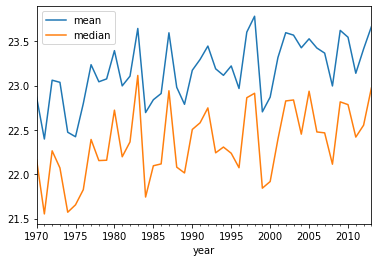

In [12]:
df_t_avg.xs('Colombia')['AverageTemperature'].plot()

In [13]:
df_t_med = df_t_avg['AverageTemperature'][['median']].reset_index()
df_t_med

,Country,year,median
0,Afghanistan,1970-12-31,17.2060
1,Afghanistan,1971-12-31,15.3170
2,Afghanistan,1972-12-31,14.0935
3,Afghanistan,1973-12-31,14.7010
4,Afghanistan,1974-12-31,14.2390
...,...,...,...
6991,Zimbabwe,2009-12-31,21.0780
6992,Zimbabwe,2010-12-31,21.9430
6993,Zimbabwe,2011-12-31,21.5110
6994,Zimbabwe,2012-12-31,21.4885


In [14]:
df_t_med['date'] = df_t_med['year'].dt.year
df_t_med['date']

0       1970
1       1971
2       1972
3       1973
4       1974
        ... 
6991    2009
6992    2010
6993    2011
6994    2012
6995    2013
Name: date, Length: 6996, dtype: int64

In [15]:
df_t_med.rename(columns={'median': 'temperature'}, inplace=True)
df_t_med

,Country,year,temperature,date
0,Afghanistan,1970-12-31,17.2060,1970
1,Afghanistan,1971-12-31,15.3170,1971
2,Afghanistan,1972-12-31,14.0935,1972
3,Afghanistan,1973-12-31,14.7010,1973
4,Afghanistan,1974-12-31,14.2390,1974
...,...,...,...,...
6991,Zimbabwe,2009-12-31,21.0780,2009
6992,Zimbabwe,2010-12-31,21.9430,2010
6993,Zimbabwe,2011-12-31,21.5110,2011
6994,Zimbabwe,2012-12-31,21.4885,2012


In [16]:
df_t_pivot = df_t_med.pivot_table(values='temperature', index='date', columns='Country')
df_t_pivot

Country,Afghanistan,Albania,Algeria,Angola,Argentina,Armenia,Australia,Austria,Azerbaijan,Bahamas,...,United Arab Emirates,United Kingdom,United States,Uruguay,Uzbekistan,Venezuela,Vietnam,Yemen,Zambia,Zimbabwe
date,,,,,,,,,,,,,,,,,,,,,
1970,17.2060,15.5060,17.2260,21.7620,17.2520,10.9960,16.6700,7.0010,11.7850,25.7450,...,28.5000,10.2890,16.1980,17.3650,15.0655,25.8830,26.5350,26.8400,21.6260,21.0600
1971,15.3170,14.4225,16.4380,21.5225,17.1560,8.3660,17.0150,7.0505,10.7400,24.9580,...,26.6080,9.2890,14.5650,17.1835,12.6180,25.2460,25.9255,26.1635,21.2165,21.2440
1972,14.0935,13.7850,16.2750,21.4285,17.5645,11.4670,17.2570,5.4295,13.1535,25.3225,...,26.7235,8.6450,15.5600,17.5920,12.2030,25.8170,26.3465,26.3970,21.4050,20.9790
1973,14.7010,14.5375,16.3945,22.0195,17.0965,9.5450,17.7365,4.9510,11.4595,25.1845,...,27.4750,8.2110,15.0010,17.2070,13.4420,26.2110,26.7850,26.3715,21.5600,21.0020
1974,14.2390,13.8750,15.0260,21.3860,17.4750,9.1385,16.8035,5.4025,12.0060,25.0185,...,26.4350,7.8880,15.1990,17.8810,12.9445,25.4450,26.2955,25.9875,21.0420,19.8520
1975,13.8405,14.9720,15.9020,21.5660,17.5400,10.0770,17.2440,6.4080,11.9270,25.9310,...,26.4855,8.5645,14.8900,17.5660,13.1640,25.6375,26.5620,25.9325,21.2630,20.6020
1976,13.8210,15.0995,15.2400,20.9660,16.6275,8.8315,17.0915,7.2250,10.2860,24.8845,...,27.0725,8.6100,14.9490,16.8585,11.8410,25.4610,26.2260,25.6500,21.0730,20.7120
1977,15.7995,15.0550,17.3735,21.5730,18.0440,7.9470,17.4440,7.1955,9.6960,24.9315,...,27.8585,8.8020,15.2250,18.3925,14.6860,26.1180,26.2600,26.0440,21.5300,21.1575
1978,15.2580,14.2140,15.7390,21.3595,17.6610,8.9385,17.3285,5.9695,11.0100,25.5675,...,27.1300,10.3485,14.8790,17.3725,13.7290,26.0410,26.3580,26.4780,21.4890,20.9800


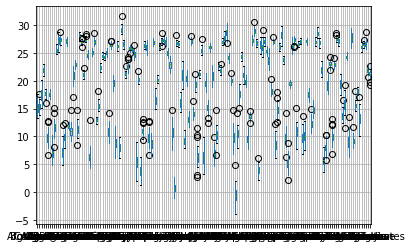

In [17]:
df_t_pivot.boxplot()

In [18]:
df_t_pivot.T.sample(2)

date,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
Country,,,,,,,,,,,,,,,,,,,,,
Yemen,26.840,26.1635,26.397,26.3715,25.9875,25.9325,25.6500,26.0440,26.478,26.350,...,26.9005,27.2940,26.8535,27.2525,26.8950,26.981,27.4700,27.1535,27.0635,28.7865
Singapore,26.898,26.7265,26.975,26.8880,26.8115,26.7055,26.6545,26.8685,26.837,26.918,...,27.1830,27.6075,27.3935,27.1395,27.1035,27.556,27.4235,27.2595,27.2350,27.6270


In [19]:
df_t_pivot.T.sample(2).T.head(4)

Country,Niger,Spain
date,,
1970,28.608,15.644
1971,28.488,13.977
1972,29.668,13.531
1973,29.084,13.909


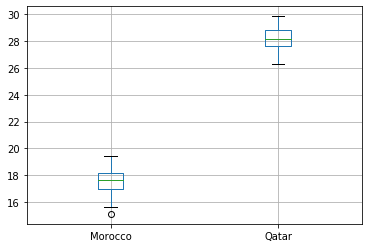

In [20]:
df_t_pivot.T.sample(2).T.boxplot()

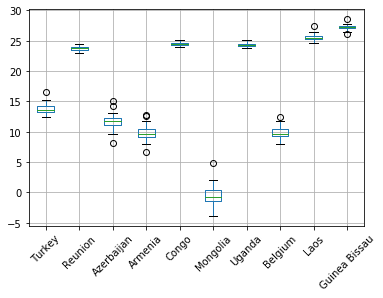

In [21]:
df_t_pivot.T.sample(10).T.boxplot(rot=45)

In [22]:
df_agri = pd.read_csv('./db/API_AG.LND.AGRI.K2_DS2_en_csv_v2_1072847.csv', header=2)
df_fore = pd.read_csv('./db/API_AG.LND.FRST.K2_DS2_en_csv_v2_1072866.csv', header=2)
df_elec = pd.read_csv('./db/API_EG.USE.CRNW.ZS_DS2_en_csv_v2_1074835.csv', header=2)
df_co2e = pd.read_csv('./db/API_EN.ATM.CO2E.KT_DS2_en_csv_v2_1068989.csv', header=2)
df_popu = pd.read_csv('./db/API_SP.POP.TOTL_DS2_en_csv_v2_1068829.csv', header=2)

In [23]:
df_elec

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,Unnamed: 64
0,Aruba,ABW,Combustible renewables and waste (% of total e...,EG.USE.CRNW.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,AFG,Combustible renewables and waste (% of total e...,EG.USE.CRNW.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Angola,AGO,Combustible renewables and waste (% of total e...,EG.USE.CRNW.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,39.848501,37.035296,37.713591,36.376107,NaN,NaN,NaN,NaN,NaN,NaN
3,Albania,ALB,Combustible renewables and waste (% of total e...,EG.USE.CRNW.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,9.358018,10.348265,8.683560,9.361381,NaN,NaN,NaN,NaN,NaN,NaN
4,Andorra,AND,Combustible renewables and waste (% of total e...,EG.USE.CRNW.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
259,Kosovo,XKX,Combustible renewables and waste (% of total e...,EG.USE.CRNW.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,9.569184,10.449394,10.502960,11.374120,NaN,NaN,NaN,NaN,NaN,NaN
260,"Yemen, Rep.",YEM,Combustible renewables and waste (% of total e...,EG.USE.CRNW.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,0.789638,0.897701,0.667503,NaN,NaN,NaN,NaN,NaN,NaN,NaN
261,South Africa,ZAF,Combustible renewables and waste (% of total e...,EG.USE.CRNW.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,7.687437,7.917985,8.019395,7.746573,NaN,NaN,NaN,NaN,NaN,NaN
262,Zambia,ZMB,Combustible renewables and waste (% of total e...,EG.USE.CRNW.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,63.881576,63.008964,61.467577,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [24]:
list(map(str, range(1911, 2015)))

['1911',
 '1912',
 '1913',
 '1914',
 '1915',
 '1916',
 '1917',
 '1918',
 '1919',
 '1920',
 '1921',
 '1922',
 '1923',
 '1924',
 '1925',
 '1926',
 '1927',
 '1928',
 '1929',
 '1930',
 '1931',
 '1932',
 '1933',
 '1934',
 '1935',
 '1936',
 '1937',
 '1938',
 '1939',
 '1940',
 '1941',
 '1942',
 '1943',
 '1944',
 '1945',
 '1946',
 '1947',
 '1948',
 '1949',
 '1950',
 '1951',
 '1952',
 '1953',
 '1954',
 '1955',
 '1956',
 '1957',
 '1958',
 '1959',
 '1960',
 '1961',
 '1962',
 '1963',
 '1964',
 '1965',
 '1966',
 '1967',
 '1968',
 '1969',
 '1970',
 '1971',
 '1972',
 '1973',
 '1974',
 '1975',
 '1976',
 '1977',
 '1978',
 '1979',
 '1980',
 '1981',
 '1982',
 '1983',
 '1984',
 '1985',
 '1986',
 '1987',
 '1988',
 '1989',
 '1990',
 '1991',
 '1992',
 '1993',
 '1994',
 '1995',
 '1996',
 '1997',
 '1998',
 '1999',
 '2000',
 '2001',
 '2002',
 '2003',
 '2004',
 '2005',
 '2006',
 '2007',
 '2008',
 '2009',
 '2010',
 '2011',
 '2012',
 '2013',
 '2014']

In [25]:
cols = ['Country Name', 'Country Code'] + list(map(str, range(1971, 2015)))
cols[:5]

['Country Name', 'Country Code', '1971', '1972', '1973']

In [26]:
df_agri.loc[:,cols]

,Country Name,Country Code,1971,1972,1973,1974,1975,1976,1977,1978,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014
0,Aruba,ABW,20.0,20.0,20.0,20.0,20.0,20.0,20.0,20.0,...,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000
1,Afghanistan,AFG,380360.0,380460.0,380480.0,380480.0,380480.0,380480.0,380500.0,380500.0,...,379100.000000,379100.000000,379100.000000,379100.000000,379100.000000,379110.000000,379100.000000,379100.000000,379100.000000,379100.000000
2,Angola,AGO,574000.0,574000.0,574000.0,574000.0,574000.0,574000.0,574000.0,574000.0,...,575900.000000,575900.000000,576900.000000,576900.000000,582900.000000,583900.000000,589900.000000,589900.000000,591900.000000,591900.000000
3,Albania,ALB,12000.0,11740.0,11460.0,11220.0,10800.0,10750.0,11090.0,11140.0,...,10770.000000,11200.000000,11190.000000,11810.000000,12013.000488,12013.000488,12010.000000,12013.000488,11873.000488,11742.900391
4,Andorra,AND,250.0,250.0,240.0,240.0,240.0,230.0,230.0,230.0,...,217.999992,217.800007,207.700005,207.600002,207.700005,197.700005,197.700005,187.600002,188.099995,188.099995
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
259,Kosovo,XKX,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,5700.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
260,"Yemen, Rep.",YEM,234260.0,234370.0,234420.0,234470.0,234600.0,234600.0,234600.0,234620.0,...,235230.000000,236270.000000,236270.000000,235170.000000,234520.000000,235790.000000,234520.000000,235500.000000,235460.000000,235460.000000
261,South Africa,ZAF,953900.0,951950.0,949900.0,948050.0,945850.0,943820.0,943200.0,942800.0,...,974830.000000,968880.000000,968900.000000,971080.000000,969880.000000,968910.000000,963740.000000,968410.000000,968410.000000,968410.000000
262,Zambia,ZMB,200530.0,202510.0,201440.0,202020.0,202370.0,204100.0,202740.0,201550.0,...,227620.000000,230480.000000,229840.000000,230870.000000,235860.000000,234360.000000,236360.000000,238360.000000,237360.000000,238360.000000


In [27]:
df_agri.loc[:,cols].melt(id_vars=['Country Name', 'Country Code']).rename(
                                                                          columns={
                                                                              'variable': 'date',
                                                                              'Country Name': 'Country',
                                                                              'Country Code': 'name',
                                                                              'value': 'agriculture'
                                                                          }  
)

,Country,name,date,agriculture
0,Aruba,ABW,1971,20.0
1,Afghanistan,AFG,1971,380360.0
2,Angola,AGO,1971,574000.0
3,Albania,ALB,1971,12000.0
4,Andorra,AND,1971,250.0
...,...,...,...,...
11611,Kosovo,XKX,2014,NaN
11612,"Yemen, Rep.",YEM,2014,235460.0
11613,South Africa,ZAF,2014,968410.0
11614,Zambia,ZMB,2014,238360.0


In [35]:
def fun_formato(df, col = 'agriculture'):
    return df.loc[:,cols].melt(id_vars=['Country Name', 'Country Code']).rename(
                                                                              columns={
                                                                                  'variable': 'date',
                                                                                  'Country Name': 'Country',
                                                                                  'Country Code': 'name',
                                                                                  'value': col})

In [44]:
df_agri = fun_formato(df_agri, col = 'agriculture')
df_fore = fun_formato(df_fore, col = 'forest')
df_elec = fun_formato(df_elec, col = 'electricprod')
df_co2e = fun_formato(df_co2e, col = 'co2')
df_popu = fun_formato(df_popu, col = 'population')
df_popu

,Country,name,date,population
0,Aruba,ABW,1971,59440.0
1,Afghanistan,AFG,1971,11475445.0
2,Angola,AGO,1971,6040777.0
3,Albania,ALB,1971,2187853.0
4,Andorra,AND,1971,25559.0
...,...,...,...,...
11611,Kosovo,XKX,2014,1821800.0
11612,"Yemen, Rep.",YEM,2014,25823485.0
11613,South Africa,ZAF,2014,54545991.0
11614,Zambia,ZMB,2014,15399753.0


In [45]:
df_t_med

,Country,year,temperature,date
0,Afghanistan,1970-12-31,17.2060,1970
1,Afghanistan,1971-12-31,15.3170,1971
2,Afghanistan,1972-12-31,14.0935,1972
3,Afghanistan,1973-12-31,14.7010,1973
4,Afghanistan,1974-12-31,14.2390,1974
...,...,...,...,...
6991,Zimbabwe,2009-12-31,21.0780,2009
6992,Zimbabwe,2010-12-31,21.9430,2010
6993,Zimbabwe,2011-12-31,21.5110,2011
6994,Zimbabwe,2012-12-31,21.4885,2012


In [46]:
df_popu['date'] = df_popu['date'].astype(float)
df_fore['date'] = df_fore['date'].astype(float)
df_elec['date'] = df_elec['date'].astype(float)
df_co2e['date'] = df_co2e['date'].astype(float)
df_agri['date'] = df_agri['date'].astype(float)
df_popu.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11616 entries, 0 to 11615
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Country     11616 non-null  object 
 1   name        11616 non-null  object 
 2   date        11616 non-null  float64
 3   population  11501 non-null  float64
dtypes: float64(2), object(2)
memory usage: 363.1+ KB


In [47]:
df_merge = pd.merge(df_t_med[['Country', 'temperature', 'date']],
                   df_popu, on = ['Country', 'date'], how = 'inner')

In [48]:
df_merge

,Country,temperature,date,name,population
0,Afghanistan,15.3170,1971,AFG,11475445.0
1,Afghanistan,14.0935,1972,AFG,11791215.0
2,Afghanistan,14.7010,1973,AFG,12108963.0
3,Afghanistan,14.2390,1974,AFG,12412950.0
4,Afghanistan,13.8405,1975,AFG,12689160.0
...,...,...,...,...,...
5886,Zimbabwe,21.0780,2009,ZWE,12526968.0
5887,Zimbabwe,21.9430,2010,ZWE,12697723.0
5888,Zimbabwe,21.5110,2011,ZWE,12894316.0
5889,Zimbabwe,21.4885,2012,ZWE,13115131.0


In [50]:
df_merge = pd.merge(df_merge,
                   df_fore, on = ['Country', 'name', 'date'], how = 'inner')

df_merge = pd.merge(df_merge,
                   df_elec, on = ['Country', 'name', 'date'], how = 'inner')

df_merge = pd.merge(df_merge,
                   df_co2e, on = ['Country', 'name', 'date'], how = 'inner')

df_merge = pd.merge(df_merge,
                   df_agri, on = ['Country', 'name', 'date'], how = 'inner')

df_merge

,Country,temperature,date,name,population,forest,electricprod,co2,agriculture
0,Afghanistan,15.3170,1971,AFG,11475445.0,NaN,NaN,1895.839,380360.0
1,Afghanistan,14.0935,1972,AFG,11791215.0,NaN,NaN,1532.806,380460.0
2,Afghanistan,14.7010,1973,AFG,12108963.0,NaN,NaN,1639.149,380480.0
3,Afghanistan,14.2390,1974,AFG,12412950.0,NaN,NaN,1917.841,380480.0
4,Afghanistan,13.8405,1975,AFG,12689160.0,NaN,NaN,2126.860,380480.0
...,...,...,...,...,...,...,...,...,...
5886,Zimbabwe,21.0780,2009,ZWE,12526968.0,159510.000000,70.325785,5603.176,163000.0
5887,Zimbabwe,21.9430,2010,ZWE,12697723.0,156240.000000,69.395060,7777.707,162000.0
5888,Zimbabwe,21.5110,2011,ZWE,12894316.0,153115.996094,65.524806,9563.536,164000.0
5889,Zimbabwe,21.4885,2012,ZWE,13115131.0,149992.001953,63.683975,7792.375,162000.0


In [51]:
df_merge.dropna()

,Country,temperature,date,name,population,forest,electricprod,co2,agriculture
62,Albania,16.5780,1990,ALB,3286542.0,7887.999878,13.579472,5515.168,11210.0
63,Albania,14.1705,1991,ALB,3266790.0,7868.499756,19.397186,4286.723,11270.0
64,Albania,16.0995,1992,ALB,3247039.0,7849.000244,26.723153,2515.562,11270.0
65,Albania,16.1495,1993,ALB,3227287.0,7829.500122,26.030213,2335.879,11260.0
66,Albania,15.7980,1994,ALB,3207536.0,7810.000000,23.363289,1925.175,11260.0
...,...,...,...,...,...,...,...,...,...
5886,Zimbabwe,21.0780,2009,ZWE,12526968.0,159510.000000,70.325785,5603.176,163000.0
5887,Zimbabwe,21.9430,2010,ZWE,12697723.0,156240.000000,69.395060,7777.707,162000.0
5888,Zimbabwe,21.5110,2011,ZWE,12894316.0,153115.996094,65.524806,9563.536,164000.0
5889,Zimbabwe,21.4885,2012,ZWE,13115131.0,149992.001953,63.683975,7792.375,162000.0


In [52]:
df_climate = df_merge.dropna()

In [54]:
df_climate.groupby('Country')['co2'].median().sort_values(ascending=False)

Country
United States    5.382124e+06
China            3.668918e+06
Japan            1.202083e+06
India            1.047706e+06
Germany          8.228125e+05
                     ...     
Haiti            1.651984e+03
Mozambique       1.584144e+03
Togo             1.285284e+03
Niger            7.847380e+02
Eritrea          6.142225e+02
Name: co2, Length: 116, dtype: float64

In [55]:
pd.set_option('display.float_format', '{:,.1f}'.format)

In [56]:
df_climate.groupby('Country')['co2'].median().sort_values(ascending=False)

Country
United States   5,382,123.7
China           3,668,917.8
Japan           1,202,082.9
India           1,047,705.9
Germany           822,812.5
                    ...    
Haiti               1,652.0
Mozambique          1,584.1
Togo                1,285.3
Niger                 784.7
Eritrea               614.2
Name: co2, Length: 116, dtype: float64

In [57]:
first_10 = df_climate.groupby('Country')['co2'].median().sort_values(ascending=False).head(10).index
first_10

Index(['United States', 'China', 'Japan', 'India', 'Germany', 'United Kingdom',
       'Canada', 'Italy', 'Mexico', 'South Africa'],
      dtype='object', name='Country')

In [59]:
df_max_co2 = df_climate[df_climate['Country'].isin(first_10)]
df_max_co2

,Country,temperature,date,name,population,forest,electricprod,co2,agriculture
965,Canada,7.0,1990,CAN,"27,691,138.0","3,482,730.0",4.8,"435,181.2","677,680.0"
966,Canada,7.4,1991,CAN,"28,037,420.0","3,482,259.1",4.8,"426,780.1","677,530.0"
967,Canada,5.3,1992,CAN,"28,371,264.0","3,481,788.1",4.7,"440,978.8","678,140.0"
968,Canada,5.4,1993,CAN,"28,684,764.0","3,481,316.9",4.5,"445,580.8","678,740.0"
969,Canada,7.2,1994,CAN,"29,000,663.0","3,480,845.9",4.9,"456,849.5","679,340.0"
...,...,...,...,...,...,...,...,...,...
5671,United States,15.7,2009,USA,"306,771,529.0","3,079,274.1",2.9,"5,263,505.5","4,099,606.9"
5672,United States,15.2,2010,USA,"309,321,666.0","3,087,200.0",3.2,"5,395,532.1","4,084,261.9"
5673,United States,15.5,2011,USA,"311,556,874.0","3,089,950.0",3.3,"5,289,680.5","4,046,693.1"
5674,United States,16.6,2012,USA,"313,830,990.0","3,092,700.0",3.6,"5,119,436.4","4,087,065.0"


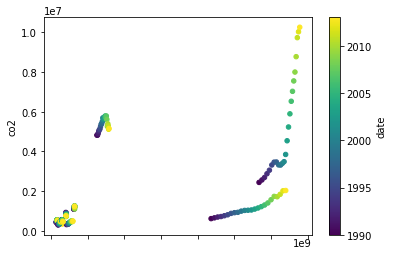

In [60]:
df_max_co2.set_index('Country').plot.scatter(
    x = 'population',
    y = 'co2',
    c = 'date',
    colormap = 'viridis'
)

In [61]:
# Correlacion
df_climate.corr()

,temperature,date,population,forest,electricprod,co2,agriculture
temperature,1.0,0.0,0.1,-0.0,0.5,-0.1,-0.0
date,0.0,1.0,0.0,-0.0,-0.1,0.0,-0.0
population,0.1,0.0,1.0,0.3,0.0,0.7,0.6
forest,-0.0,-0.0,0.3,1.0,-0.0,0.5,0.6
electricprod,0.5,-0.1,0.0,-0.0,1.0,-0.1,-0.1
co2,-0.1,0.0,0.7,0.5,-0.1,1.0,0.7
agriculture,-0.0,-0.0,0.6,0.6,-0.1,0.7,1.0


In [62]:
import seaborn as sns

C:\Users\afplazasac\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


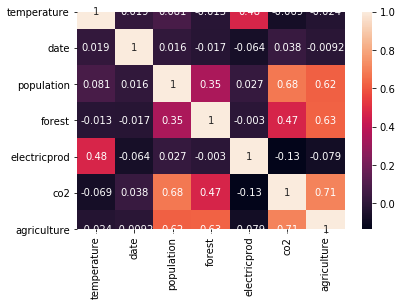

In [64]:
sns.heatmap(df_climate.corr(), annot=True)

In [66]:
df_median = df_climate.groupby('date').median()
df_median

,temperature,population,forest,electricprod,co2,agriculture
date,,,,,,
1990,20.7,"10,230,934.0","57,610.0",13.7,"31,217.2","91,700.0"
1991,20.8,"10,373,400.0","63,705.0",13.8,"29,710.0","92,100.0"
1992,18.7,"9,188,305.5","45,621.0",9.0,"26,420.7","89,700.0"
1993,18.7,"9,951,683.5","44,579.0",9.8,"28,267.1","89,890.0"
1994,20.1,"9,991,525.0","42,572.0",8.4,"29,640.4","89,150.0"
1995,18.7,"10,110,088.0","42,612.5",10.4,"28,111.2","84,615.0"
1996,19.3,"10,111,972.5","41,969.0",10.2,"29,656.9","84,470.0"
1997,19.6,"10,112,988.5","41,510.5",9.9,"30,216.1","83,200.0"
1998,20.2,"10,114,598.0","41,052.0",8.9,"30,852.3","82,225.0"


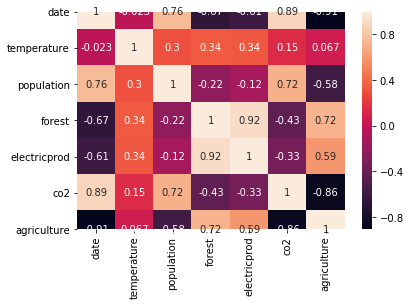

In [67]:
sns.heatmap(df_median.reset_index().corr(), annot=True)

In [68]:
from pandas.plotting  import scatter_matrix

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001C685EF58C8>,
      dtype=object)

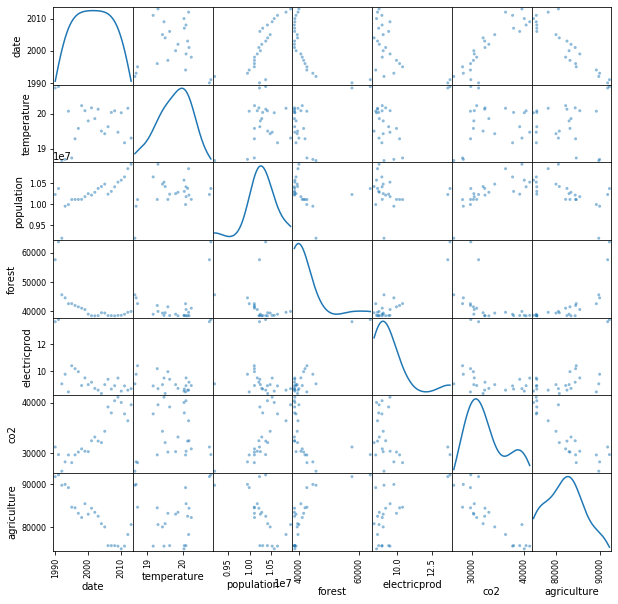

In [70]:
scatter_matrix(df_median.reset_index(), diagonal='kde', figsize=(10, 10))

In [71]:
from pandas.plotting import parallel_coordinates

In [76]:
df_suramerica = df_climate[
    df_climate['Country'].isin([
        'Colombia',
        'Argentina',
        'Bolivia',
        'Peru',
        'Chile',
        'Mexico'
    ])][[
        'Country',
        'temperature',
        'co2',
        'agriculture',
        'forest'
    ]]

df_suramerica

,Country,temperature,co2,agriculture,forest
191,Argentina,17.4,"112,147.9","1,275,650.0","347,930.0"
192,Argentina,17.8,"117,098.3","1,276,600.0","344,997.0"
193,Argentina,17.1,"121,352.0","1,277,550.0","342,064.0"
194,Argentina,17.5,"117,927.1","1,278,500.0","339,131.0"
195,Argentina,18.3,"122,408.1","1,279,480.0","336,198.0"
...,...,...,...,...,...
4252,Peru,18.4,"51,704.7","239,460.0","749,544.0"
4253,Peru,18.0,"57,593.9","240,230.0","748,110.0"
4254,Peru,18.3,"49,632.8","241,040.0","746,434.0"
4255,Peru,18.7,"55,071.0","243,321.0","744,758.0"


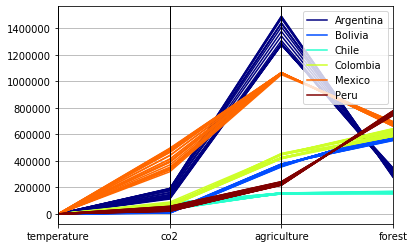

In [78]:
parallel_coordinates(df_suramerica, 'Country', colormap = 'jet')

In [86]:
df = pd.DataFrame({ 'edad' : [ 10, 9, 13, 14, 12, 11, 12], 'cm' : [ 115, 110, 130, 155, 125, 120, 125], 'pais' : [ 'co', 'mx', 'co', 'mx', 'mx', 'ch', 'ch'], 'genero' : [ 'M', 'F', 'F', 'M', 'M', 'M', 'F'], 'Q1' : [ 5, 10, 8, np.nan, 7, 8, 3], 'Q2' : [ 7, 9, 9, 8, 8, 8, 9.] }, index = ['ana','benito','camilo','daniel','erika','fabian','gabriela'])
df

,edad,cm,pais,genero,Q1,Q2
ana,10,115,co,M,5.0,7.0
benito,9,110,mx,F,10.0,9.0
camilo,13,130,co,F,8.0,9.0
daniel,14,155,mx,M,nan,8.0
erika,12,125,mx,M,7.0,8.0
fabian,11,120,ch,M,8.0,8.0
gabriela,12,125,ch,F,3.0,9.0


In [91]:
df = pd.DataFrame({ 'edad' : [ 10, 9, 13, 14, 12, 11, 12], 'cm' : [ 115, 110, 130, 155, 125, 120, 125], 'pais' : [ 'co', 'mx', 'co', 'mx', 'mx', 'ch', 'ch'], 'genero' : [ 'M', 'F', 'F', 'M', 'M', 'M', 'F'], 'Q1' : [ 5, 10, 8, np.nan, 7, 8, 3], 'Q2' : [ 7, 9, 9, 8, 8, 8, 9.] }, index = ['ana','benito','camilo','daniel','erika','fabian','gabriela']) 
print(df['edad'] >= 12)

ana         False
benito      False
camilo       True
daniel       True
erika        True
fabian      False
gabriela     True
Name: edad, dtype: bool
